# Textual Similarity

Thanks to Professor Teddy Roland, who taught the class Literature and Data in Spring 2016, for the basis of the following code.
This notebook measures and visualizes the distances between certain texts on the basis of their vocabulary.


# Preparation

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
# returns the meanings (english translations) of words in a line of raw text
def term_finder(line):
    terms = re.findall(r"(?<=\[)(.*?)(?=\])", line)
    terms += re.findall(r"(?<=\:)([^:]*?)(?=\[1])", line)
    terms = [term for term in terms if term != '1']
    return terms

# takes a list of lists ([['hi'], ['hello']]) and returns a single list (['hi', 'hello'])
def list_flattening(pn_list):
    return [noun for nouns in pn_list for noun in nouns]

# cleans the raw data from the text table, formats the column label names, and finds the english terms for each line of text
def text_splitter(table):
    col = 'text'
    if col not in table.labels:
        col = ' ' + col
    translation = table.apply(term_finder, col)
    return list_flattening(translation)


In [3]:
corpus_path = "corpus/"

# opens the text file, returns the title and the list of english terms
def text_reader(text_name):
    text = Table.read_table(corpus_path+text_name, ',')
    title = text[1][0]
    text_list = text_splitter(text)
    return (text_list, title)

# checks if any character in a word is a digit -- returns true, if digit is found
def contains_digit(w):
    return np.any([char.isdigit() or char == '.' for char in w])

In [4]:
# dir_list.txt contains names of all the text files of the books
with open('corpus/dir_list.txt', 'r') as file_in:
        corpus = file_in.read().split()

corpus_table = Table(['Text', 'Title', 'Word List'])
rows = []

# for each text in the dir_list: parse the text, separate out the english words, find the title, and add it as a row
for text_name in corpus:
    text_list, title = text_reader(text_name)
    rows.append([text_name, title, text_list])

corpus_table = corpus_table.with_rows(rows)

#formatting, making sure the word lists contain no numbers
vocabulary = list_flattening(corpus_table['Word List']) 
vocabulary = list(set([word for word in vocabulary if contains_digit(word) != True]))
title_columns = corpus_table.select(['Title', 'Text'])

corpus_table

Text,Title,Word List
c.0.1.1.txt,Ur III catalogue from Nibru (N1),"['first', 'dwelling', 'big', 'ascend', 'Enki', 'horizon' ..."
c.0.1.2.txt,Ur III catalogue at Yale (Y1),"['deity', 'kohl', 'split', 'speak', 'different', 'Enlil' ..."
c.0.2.01.txt,OB catalogue from Nibru (N2),"['king', 'heart', 'king', 'cvne', 'speak', 'lord', 'appr ..."
c.0.2.02.txt,OB catalogue in the Louvre (L),"['distant', 'Enlil', 'lord', 'prince', 'sun', 'that', 'l ..."
c.0.2.03.txt,OB catalogue from Urim (U1),"['king', 'name', 'everlasting', 'king', 'Waradsin', 'be' ..."
c.0.2.04.txt,OB catalogue from Urim (U2),"['lady', 'star', 'dowager', 'big', 'living-creature', 'k ..."
c.0.2.05.txt,OB catalogue from Urim (U3),"['foundation', 'big', 'radiance', 'hero', 'strong', 'per ..."
c.0.2.06.txt,OB catalogue from Nibru (N3),"['hero', 'bison', 'great', 'where?', 'abundant', 'dear', ..."
c.0.2.07.txt,OB catalogue possibly from Zimbir (B1),"['speak', 'city', 'tears', 'instrument', 'Nin.X', 'expre ..."
c.0.2.08.txt,OB catalogue from Nibru (N4),"['stand', 'lament', 'raise', 'trust', 'powerful', 'forsa ..."


In [5]:
# attaches title and text columns to table 
def format_title(table):
    table = table.with_columns(title_columns)
    table = table.move_to_start('Title').move_to_start('Text')
    return table

In [6]:
# Create a document term matrix for all the texts in the corpus with the vocabulary of all the books as columns and the
# number of times each word is mentioned in each text as rows

def word_counts(vocab, book):
    row_count = []
    for word in vocab:
        row_count.append(book.count(word))
    return row_count

dtm = []

# counting number of times each word is mentioned for each book
for book in corpus_table['Word List']: 
    dtm.append(word_counts(vocabulary, book))
    
docu_term_matrix = Table(vocabulary).with_rows(dtm)

# reattaching text and title columns
docu_term_matrix = format_title(docu_term_matrix) 
docu_term_matrix

Text         | Title                                  | Badziaba | bind | tread | stone-cutter | Pabiluh | corpse | Tentland | oven | comestible | footstool | bolster | mountain | rage | Urninazu | tongue | sky  | porridge | flood | hostile | fragrance | scythe? | eating | matrix | area | grind | sink | Iku  | bison | Ubšuʾunkenak | dirt | Idilpašunu | Babum | thickness | Gaeš | boat-builder | copper | KUbireš | butterfly | illuminating | Šerida | tetherer | forehead | serpent | roar | animals | Amaugukuku | flee | partnership | Ilakniʾid | mesh | black | Tarah | height | hang | rider | living-things | Niŋin | Eʾengura | chaff | Lugalanemundu | ~equid | notation | Lilia | dew  | ~boat | profession? | Euduna | eat  | levee | ~bird | bolt-handler | Dabrum | Inanaka | cabinet | turban | loaf | grass | bush | trough | advance? | footboard | stair | Lugalmelem | sage | gravel? | sesame | tent | Agade | sow  | bristle | wolf | Edukug | LI   | turtle | lie  | withstand | place | Zinnum | reed | tax-collector | Nintinuga | KU   | tune? | be-that-as-it-may | Ešumeša | love | brotherhood | Dumuturšugi | Eabšagala | search | Urud | Udgudugduga | Gudam | Nibru | container | Enenlilekiaŋ | Inanak | GAZ  | Emelemhuš | slip | Uṣiwatar | water | quicksand | fasting | Ninul | ~chariot | Idigna | exaltedness | Asari | goose | Šegsaŋaš | weed | Martu | Idibi | Arwium | interest | destitute | herald | ~grain | pen  | assassin | reaper | Irgigi | Nintilmud | Tunilusag | Eguddušar | midrib | shade | starvation | person | Ešenšena | locus | tavern | Babylon | hot  | Kaninnamra | Puannum | Duʾur | barge | Aššu | copy | Šakkan | dust-heap | radiance | stern | ~architecture | Papsir | advocate | knob | Urlugal | oval | tear? | Lugalure | fish-storage | murderer | Eŋalgasud | Enlilmassu | snake | headache | healthy | breathe | Emuš | fruit | planning | marshes | Niŋirsig | ever | digging | short | intestines | Idniŋindua | ~mountain | ordeal-river | fish | Eŋiškešdakalamak | cry  | ax   | Kimaš | Nezila | contest | Zarŋu | tube | plum | conquest | priesthood | Namrat | lead | enemy-territory | Sadarnuna | Kurgamabi | flash | bone | cloud? | Saŋburu | toggle-pin | tremble | Iltasadum | Igiheŋala | harness | cross | Urumaš | cowshed | wood | they | snap | Enentarzid | BIRHARtura | pigeon | evil | justice | cheese | Asarluhi | flask | disease | cedar | BI   | hunter | NIM  | Išuil | basket | Šuhalbi | ŠUB  | Ansigaria | equal | citizen | yesterday? | bud  | Dagan | lamb | peddlar | orchard | chickpea? | willow | TE   | Yarla | Idamarsuena | lower | pious | Melemkiš | hammer-stone? | frond | until | eyebrow | daughter | dress | dense | sprout | bitumen | Anzagar | Sinmagir | pole-pin | Kiš  | runner | Magan | Enindašurumak | Lugalgudua | shepherd | self | that | cake | malodorous | flame | Hadaniš | check | Šagegur | TU   | Tutub | TUR  | Larsam | Kindattu | burn | stock | tear | shield | split | flower | Nannasuen | groats | AŠ   | I    | gate | station? | comb | claw | all  | turn | tureen | diorite | vulva | lady | Guŋišbara | Allub | last-year | demon | abandon | Gilgameš | torch | Langi | Irnina | running | boatman | mirror | bread | adornment | lame | Mešlam | submission | road | live | Harali | pray | cauldron | leatherworker | Laʾibum | abomination | TI   | storeroom | SAR  | animal-noise | maul? | animal-pen | Lugalanbara | general | covering? | rituals | Maguena | sneer | Mušsaŋimin | Kalumum | death | madder | enclose | Lugalzagesi | policeman | Sabara | wise | encircle | murder | field | doorkeeper? | ~furrow | abundant | worker | form | companion? | fox  | Erimabinušubu | Ninazimua | Simurrum | clear | Enlilalsag | Ešdamkug | Ebabbar | irrigation-device | poplar | pellet | pigsty | plough? | goddess | response | Lugalšude | firmament | fountain | Ŋaŋiššua | shoulder | Mešanepada | steppe | clothing | Šarrumiter | Šugalam | vow  | belt | GA   | Nanše | long-lasting | drink | bead | blinkers | scorpion | KUbirešdildareš | Tabtakuŋal | Imi  | Kakk

# Normalization

In [7]:
# In order to make apples-to-apples comparisons across books, we can normalize our values
# by dividing each word count by the total number of words in its book.

# divides each row of word counts by the total number of words in the book
def normalize(table):
    new_rows = []
    labels = list(table.labels)
    for row in table.to_array(): 
        row = list(row)
        row_sum = np.sum(row)
        for i in range(len(row)):
            row[i] /= row_sum
        new_rows.append(row)
    return Table(labels).with_rows(new_rows)

# normalize document term matrix, displaying with text and title columns
normalized_dtm = normalize(docu_term_matrix.drop(['Title', 'Text']))
format_title(normalized_dtm)

Text         | Title                                  | Badziaba | bind | tread | stone-cutter | Pabiluh | corpse | Tentland | oven | comestible | footstool | bolster | mountain  | rage | Urninazu | tongue | sky       | porridge | flood     | hostile | fragrance | scythe? | eating | matrix | area | grind | sink | Iku  | bison     | Ubšuʾunkenak | dirt | Idilpašunu | Babum | thickness | Gaeš | boat-builder | copper | KUbireš | butterfly | illuminating | Šerida | tetherer | forehead   | serpent | roar | animals | Amaugukuku | flee | partnership | Ilakniʾid | mesh | black | Tarah | height | hang | rider     | living-things | Niŋin | Eʾengura | chaff | Lugalanemundu | ~equid | notation | Lilia | dew  | ~boat | profession? | Euduna | eat  | levee | ~bird | bolt-handler | Dabrum | Inanaka | cabinet | turban | loaf | grass     | bush | trough | advance? | footboard | stair | Lugalmelem | sage | gravel? | sesame | tent | Agade | sow  | bristle | wolf | Edukug | LI   | turtle | lie       | withstand | place     | Zinnum | reed       | tax-collector | Nintinuga | KU   | tune? | be-that-as-it-may | Ešumeša | love | brotherhood | Dumuturšugi | Eabšagala | search | Urud | Udgudugduga | Gudam      | Nibru     | container | Enenlilekiaŋ | Inanak | GAZ  | Emelemhuš | slip | Uṣiwatar | water      | quicksand | fasting | Ninul | ~chariot | Idigna | exaltedness | Asari | goose      | Šegsaŋaš | weed | Martu | Idibi | Arwium | interest | destitute | herald | ~grain | pen  | assassin | reaper | Irgigi | Nintilmud | Tunilusag | Eguddušar | midrib | shade | starvation | person     | Ešenšena | locus | tavern | Babylon | hot  | Kaninnamra | Puannum | Duʾur | barge | Aššu | copy | Šakkan | dust-heap | radiance  | stern | ~architecture | Papsir | advocate | knob | Urlugal | oval | tear? | Lugalure | fish-storage | murderer | Eŋalgasud | Enlilmassu | snake      | headache | healthy | breathe | Emuš | fruit      | planning | marshes | Niŋirsig | ever | digging | short | intestines | Idniŋindua | ~mountain | ordeal-river | fish       | Eŋiškešdakalamak | cry  | ax   | Kimaš | Nezila | contest | Zarŋu | tube | plum | conquest | priesthood | Namrat | lead | enemy-territory | Sadarnuna | Kurgamabi | flash | bone | cloud? | Saŋburu | toggle-pin | tremble | Iltasadum | Igiheŋala | harness | cross | Urumaš | cowshed | wood | they | snap | Enentarzid | BIRHARtura | pigeon | evil | justice | cheese | Asarluhi | flask | disease | cedar | BI   | hunter | NIM  | Išuil | basket    | Šuhalbi | ŠUB  | Ansigaria | equal      | citizen | yesterday? | bud  | Dagan | lamb | peddlar | orchard | chickpea? | willow | TE   | Yarla | Idamarsuena | lower | pious | Melemkiš | hammer-stone? | frond | until | eyebrow | daughter | dress | dense | sprout | bitumen | Anzagar | Sinmagir | pole-pin | Kiš  | runner | Magan | Enindašurumak | Lugalgudua | shepherd | self | that      | cake | malodorous | flame | Hadaniš | check | Šagegur | TU   | Tutub | TUR  | Larsam | Kindattu | burn | stock | tear      | shield | split      | flower | Nannasuen | groats | AŠ   | I         | gate | station? | comb | claw | all  | turn       | tureen | diorite | vulva | lady      | Guŋišbara | Allub | last-year | demon | abandon | Gilgameš | torch | Langi | Irnina | running | boatman | mirror | bread | adornment | lame | Mešlam | submission | road | live       | Harali | pray | cauldron | leatherworker | Laʾibum | abomination | TI   | storeroom | SAR  | animal-noise | maul? | animal-pen | Lugalanbara | general | covering? | rituals | Maguena | sneer | Mušsaŋimin | Kalumum | death | madder | enclose | Lugalzagesi | policeman | Sabara | wise       | encircle | murder | field | doorkeeper? | ~furrow | abundant  | worker | form | companion? | fox  | Erimabinušubu | Ninazimua | Simurrum | clear | Enlilalsag | Ešdamkug | Ebabbar | irrigation-device | poplar | pellet | pigsty | plough? | goddess | response | Lugalšude | firmament | fountain | Ŋaŋiššua | shoulder | Mešanepada | steppe | clothing | Šarrumiter | Šu

In [8]:
# converting document term matrix to data frame
dtm = normalized_dtm.to_df()
dtm

,Badziaba,bind,tread,stone-cutter,Pabiluh,corpse,Tentland,oven,comestible,footstool,...,Yarlagab,tied,Gemetummal,shine?,dam,steward,blood,Dabta,~brewer,waters
0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.006944,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


# Streamlining

In [9]:
# Calculate distances among texts in vector space
from sklearn.metrics import pairwise

title_list = docu_term_matrix['Title']
dist_matrix = pairwise.pairwise_distances(dtm, metric='euclidean')
Table(title_list).with_rows(dist_matrix)

Ur III catalogue from Nibru (N1),Ur III catalogue at Yale (Y1),OB catalogue from Nibru (N2),OB catalogue in the Louvre (L),OB catalogue from Urim (U1),OB catalogue from Urim (U2),OB catalogue from Urim (U3),OB catalogue from Nibru (N3),OB catalogue possibly from Zimbir (B1),OB catalogue from Nibru (N4),OB catalogue at Andrews University (B4),OB catalogue at Yale (Y2),OB catalogue from Nibru (N6),Enki and Ninhursaŋa,Enki and Ninmah,Enki and the world order,Enki's journey to Nibru,Enlil and Ninlil,Enlil and Sud,Inana and Enki,Inana and Ebih,Inana and Šu-kale-tuda,Inana and Gudam,Inana and An,Dumuzid and Ŋeštin-ana,Dumuzid and his sisters,Inana's descent to the nether world,Dumuzid's dream,Inana and Bilulu: an ulila to Inana,Nanna-Suen's journey to Nibru,Ninurta's return to Nibru: a šir-gida to Ninurta,Ninurta's exploits: a šir-sud (?) to Ninurta,Ninurta and the turtle,The marriage of Martu,Ninŋišzida's journey to the nether world,The Flood story,How grain came to Sumer,The šumunda grass,Pabilsaŋ's journey to Nibru,Gilgameš and Aga,Gilgameš and the bull of heaven,The death of Gilgameš,Gilgameš Enkidu and the nether world,Gilgameš and Huwawa (Version B),Gilgameš and Huwawa (Version A),Lugalbanda in the mountain cave,Lugalbanda and the Anzud bird,Enmerkar and the lord of Aratta,Enmerkar and En-suhgir-ana,The Sumerian king list,The rulers of Lagaš,The history of the Tummal,Sargon and Ur-Zababa,The cursing of Agade,The victory of Utu-heŋal,The building of Ninŋirsu's temple (Gudea cylinders A and B),The lament for Urim,The lament for Sumer and Urim,The lament for Nibru,The lament for Unug,The lament for Eridug,An adab to Bau for Luma (Luma A),A tigi to Bau for Gudea (Gudea A),The death of Ur-Namma (Ur-Namma A),A tigi to Enlil for Ur-Namma (Ur-Namma B),A praise poem of Ur-Namma (Ur-Namma C),Ur-Namma the canal-digger (Ur-Namma D),A šir-namšub (?) to Nanna for Ur-Namma (Ur-Namma E),A šir-namšub to Nanna for Ur-Namma (Ur-Namma F),A balbale to Enlil for Ur-Namma (Ur-Namma G),A praise poem of Ur-Namma (Ur-Namma H),A praise poem of Ur-Namma (Ur-Namma I),A praise poem of Šulgi (Šulgi A),A praise poem of Šulgi (Šulgi B),A praise poem of Šulgi (Šulgi C),A praise poem of Šulgi (Šulgi D),A praise poem of Šulgi (Šulgi E),An adab to Enlil for Šulgi (Šulgi G),A tigi (?) for Šulgi (Šulgi L),A lullaby for a son of Šulgi (Šulgi N),A praise poem of Šulgi (Šulgi O),A praise poem of Šulgi (Šulgi P),An adab (?) to Utu for Šulgi (Šulgi Q),Šulgi and Ninlil's barge: a tigi (?) to Ninlil (Šulgi R),A tigi to Ninurta for Šulgi (Šulgi T),An adab (?) to Nergal for Šulgi (?) (Šulgi U),A dedication of a statue (Šulgi V),A praise poem of Šulgi (Šulgi W),A praise poem of Šulgi (Šulgi X),A praise poem of Šulgi (Šulgi Y),A love song of Šulgi (Šulgi Z),A song of Šulgi,A praise poem of Šulgi,Amar-Suena and Enki's temple (Amar-Suena A),A balbale to Bau for Šu-Suen (Šu-Suen A),A balbale to Inana for Šu-Suen (Šu-Suen B),A balbale to Inana for Šu-Suen (Šu-Suen C),A tigi (?) to Ninurta for Šu-Suen (Šu-Suen D),An adab to An for Šu-Suen (Šu-Suen E),An adab (?) to Suen for Šu-Suen (Šu-Suen F),A praise poem of Šu-Suen (Šu-Suen I),A hymn for Šu-Suen,A tigi to Suen for Ibbi-Suen (Ibbi-Suen A),A šir-namgala to Mešlamta-ea and Lugal-era for Ibbi-Suen (Ibbi-Suen B),An adab to Suen for Ibbi-Suen (Ibbi-Suen C),An ululumama to Suen for Ibbi-Suen (Ibbi-Suen D),A hymn to Suen for Ibbi-Suen (Ibbi-Suen E),Išbi-Erra and Kindattu (Išbi-Erra B),A tigi to Nanaya for Išbi-Erra (Išbi-Erra C),A hymn to Ninisina for Išbi-Erra (Išbi-Erra D),An adab to Nergal for Šu-ilīšu (Šu-ilīšu A),An adab for Šu-ilīšu (Šu-ilīšu C),A šir-namursaŋa to Ninsiana for Iddin-Dagan (Iddin-Dagan A),A praise poem of Iddin-Dagan (Iddin-Dagan B),An adab to Ningublaga for Iddin-Dagan (Iddin-Dagan C),A šir-namerima (?) for Iddin-Dagan (Iddin-Dagan D),A praise poem of Išme-Dagan (Išme-Dagan A + V),An adab to Bau for Išme-Dagan (Išme-Dagan B),A hymn to Nibru and Išme-Dagan (Išme-Dagan C),An adab (?) to Enki for Išme-Dagan (Išme-Da

# Multi-Dimensional Scaling

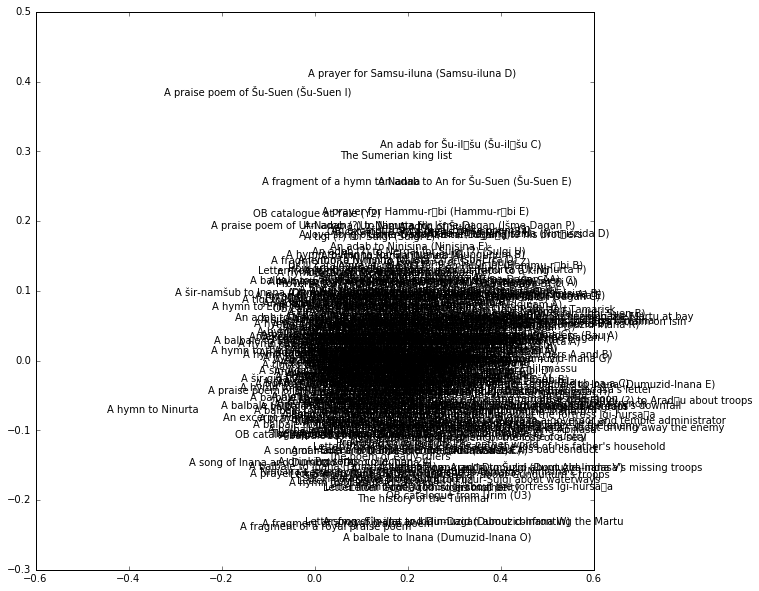

In [10]:
# Measures the relative distances among points in high dimensional space
# and projects them into two-dimensional space.

# This code was adapted from Professor Teddy Roland's iPython Notebook on Textual Similarity to scale down the vector graphs
# and gain a visual understanding of the relationships between the texts.

from sklearn.manifold import MDS

mds = MDS(n_components = 2, dissimilarity="precomputed")
embeddings = mds.fit_transform(dist_matrix)

_, title_plot = plt.subplots(figsize=(10,10))
title_plot.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(title_list)):
    title_plot.annotate(title_list[i], ((embeddings[i,0], embeddings[i,1])))
    

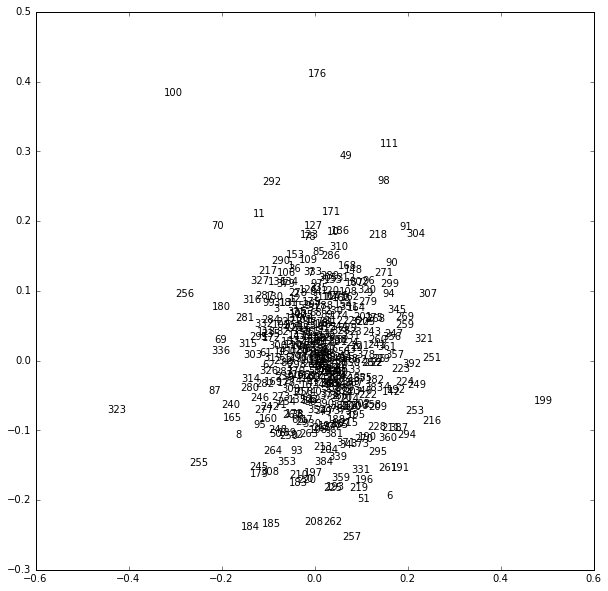

In [11]:
_, num_plot = plt.subplots(figsize=(10,10))
num_plot.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(title_list)):
    num_plot.annotate(i, ((embeddings[i,0], embeddings[i,1])))
    

In [12]:
# let's try to make this plot more readable by only looking at specific heroic texts!

heroic_texts = ['Gilgameš and Aga', 'Gilgameš and the bull of heaven', 'The death of Gilgameš',
                  'Gilgameš Enkidu and the nether world', 'Gilgameš and Huwawa (Version B)', 'Gilgameš and Huwawa (Version A)',
                  'Lugalbanda in the mountain cave', 'Lugalbanda and the Anzud bird',
                  'Enmerkar and the lord of Aratta', 'Enmerkar and En-suhgir-ana']

heroic_abbrev = ['G_Aga', 'G_heaven', 'G_death', 'G_world', 'G_Huwawa_B', 'G_Huwawa_A', 'L_cave', 'L_bird', 'E_Aratta', 'E_E']

In [13]:
# select rows that correspond to certain values for a specific column
def select_values(table, column, true_vals):
    lst = []
    for i in range(len(table[column])):
        val = table[column][i]
        if val in true_vals:
            lst.append(i)
    return lst

heroic_dtm = docu_term_matrix.take(select_values(docu_term_matrix, 'Title', heroic_texts))
heroic_dtm

Text            | Title                                | Badziaba | bind | tread | stone-cutter | Pabiluh | corpse | Tentland | oven | comestible | footstool | bolster | mountain | rage | Urninazu | tongue | sky  | porridge | flood | hostile | fragrance | scythe? | eating | matrix | area | grind | sink | Iku  | bison | Ubšuʾunkenak | dirt | Idilpašunu | Babum | thickness | Gaeš | boat-builder | copper | KUbireš | butterfly | illuminating | Šerida | tetherer | forehead | serpent | roar | animals | Amaugukuku | flee | partnership | Ilakniʾid | mesh | black | Tarah | height | hang | rider | living-things | Niŋin | Eʾengura | chaff | Lugalanemundu | ~equid | notation | Lilia | dew  | ~boat | profession? | Euduna | eat  | levee | ~bird | bolt-handler | Dabrum | Inanaka | cabinet | turban | loaf | grass | bush | trough | advance? | footboard | stair | Lugalmelem | sage | gravel? | sesame | tent | Agade | sow  | bristle | wolf | Edukug | LI   | turtle | lie  | withstand | place | Zinnum | reed | tax-collector | Nintinuga | KU   | tune? | be-that-as-it-may | Ešumeša | love | brotherhood | Dumuturšugi | Eabšagala | search | Urud | Udgudugduga | Gudam | Nibru | container | Enenlilekiaŋ | Inanak | GAZ  | Emelemhuš | slip | Uṣiwatar | water | quicksand | fasting | Ninul | ~chariot | Idigna | exaltedness | Asari | goose | Šegsaŋaš | weed | Martu | Idibi | Arwium | interest | destitute | herald | ~grain | pen  | assassin | reaper | Irgigi | Nintilmud | Tunilusag | Eguddušar | midrib | shade | starvation | person | Ešenšena | locus | tavern | Babylon | hot  | Kaninnamra | Puannum | Duʾur | barge | Aššu | copy | Šakkan | dust-heap | radiance | stern | ~architecture | Papsir | advocate | knob | Urlugal | oval | tear? | Lugalure | fish-storage | murderer | Eŋalgasud | Enlilmassu | snake | headache | healthy | breathe | Emuš | fruit | planning | marshes | Niŋirsig | ever | digging | short | intestines | Idniŋindua | ~mountain | ordeal-river | fish | Eŋiškešdakalamak | cry  | ax   | Kimaš | Nezila | contest | Zarŋu | tube | plum | conquest | priesthood | Namrat | lead | enemy-territory | Sadarnuna | Kurgamabi | flash | bone | cloud? | Saŋburu | toggle-pin | tremble | Iltasadum | Igiheŋala | harness | cross | Urumaš | cowshed | wood | they | snap | Enentarzid | BIRHARtura | pigeon | evil | justice | cheese | Asarluhi | flask | disease | cedar | BI   | hunter | NIM  | Išuil | basket | Šuhalbi | ŠUB  | Ansigaria | equal | citizen | yesterday? | bud  | Dagan | lamb | peddlar | orchard | chickpea? | willow | TE   | Yarla | Idamarsuena | lower | pious | Melemkiš | hammer-stone? | frond | until | eyebrow | daughter | dress | dense | sprout | bitumen | Anzagar | Sinmagir | pole-pin | Kiš  | runner | Magan | Enindašurumak | Lugalgudua | shepherd | self | that | cake | malodorous | flame | Hadaniš | check | Šagegur | TU   | Tutub | TUR  | Larsam | Kindattu | burn | stock | tear | shield | split | flower | Nannasuen | groats | AŠ   | I    | gate | station? | comb | claw | all  | turn | tureen | diorite | vulva | lady | Guŋišbara | Allub | last-year | demon | abandon | Gilgameš | torch | Langi | Irnina | running | boatman | mirror | bread | adornment | lame | Mešlam | submission | road | live | Harali | pray | cauldron | leatherworker | Laʾibum | abomination | TI   | storeroom | SAR  | animal-noise | maul? | animal-pen | Lugalanbara | general | covering? | rituals | Maguena | sneer | Mušsaŋimin | Kalumum | death | madder | enclose | Lugalzagesi | policeman | Sabara | wise | encircle | murder | field | doorkeeper? | ~furrow | abundant | worker | form | companion? | fox  | Erimabinušubu | Ninazimua | Simurrum | clear | Enlilalsag | Ešdamkug | Ebabbar | irrigation-device | poplar | pellet | pigsty | plough? | goddess | response | Lugalšude | firmament | fountain | Ŋaŋiššua | shoulder | Mešanepada | steppe | clothing | Šarrumiter | Šugalam | vow  | belt | GA   | Nanše | long-lasting | drink | bead | blinkers | scorpion | KUbirešdildareš | Tabtakuŋal | Imi  | Kak

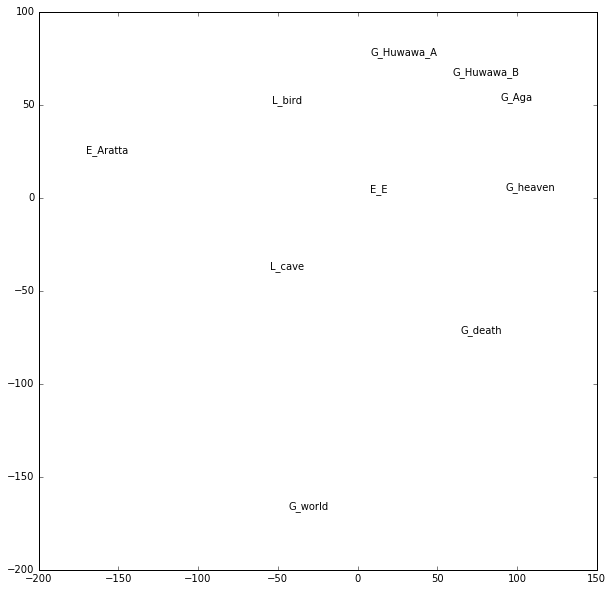

In [14]:
heroic_dtm = heroic_dtm.drop(['Text', 'Title']).to_df()
heroic_matrix = pairwise.pairwise_distances(heroic_dtm, metric='euclidean')

h_embeddings = mds.fit_transform(heroic_matrix)

_, heroic_plot  = plt.subplots(figsize=(10,10))
heroic_plot.scatter(h_embeddings[:,0], h_embeddings[:,1], alpha=0)
for i in np.arange(len(heroic_texts)):
    heroic_plot.annotate(heroic_abbrev[i], ((h_embeddings[i,0], h_embeddings[i,1])))